In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [22]:
img = cv.imread('boat.jpg')
img_blur = cv.GaussianBlur(img, (7, 7), 0)
img2 = cv.cvtColor(img_blur,cv.COLOR_BGR2GRAY)
ret, th1 = cv.threshold(img2, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

result = img.copy()
contours = cv.findContours(th1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv.boundingRect(cntr)
    cv.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)

cv.imshow('Otsu', result)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
img = np.ones((3, 3), dtype = np.uint8)
img2 = cv.imread('leaf.jfif')
ret, th1 = cv.threshold(img2, 50, 255, cv.THRESH_BINARY)

erode = cv.erode(th1, img, iterations = 1)

cv.imshow('Erosion', erode)
cv.waitKey(0)
cv.destroyAllWindows()

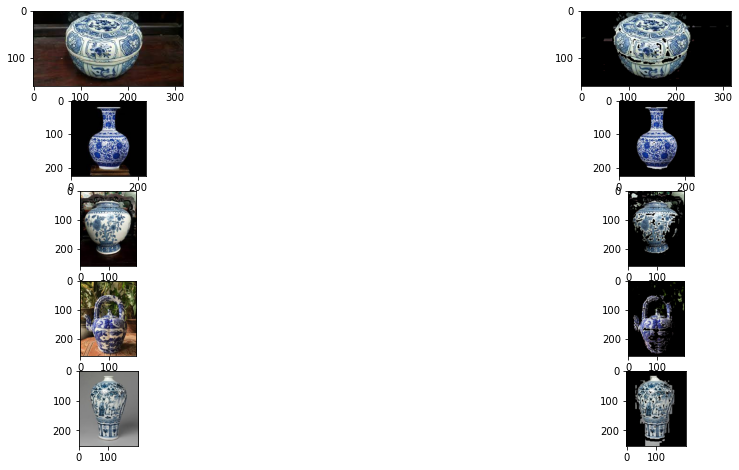

In [69]:
im1 = cv.imread('porcelain1.jfif')
im2 = cv.imread('porcelain2.jfif')
im3 = cv.imread('porcelain3.jfif')
im4 = cv.imread('porcelain4.jfif')
im5 = cv.imread('porcelain5.jfif')
list = [im1, im2, im3, im4, im5]
blue_low = (40, 0, 50)
blue_high = (255, 255, 255)
f, ax = plt.subplots(5, 2, figsize = (18, 8))

for i in range(5):
    list[i] = cv.cvtColor(list[i], cv.COLOR_BGR2RGB)
    img_hsv = cv.cvtColor(list[i], cv.COLOR_RGB2HSV)

    mask = cv.inRange(img_hsv, blue_low, blue_high)
    res = cv.bitwise_and(list[i], list[i], mask = mask)

    ax[i][0].imshow(list[i])
    ax[i][1].imshow(res)

plt.show()